# DSCI 531 Lecture 7: Intro to Plotting with `seaborn`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

Useful learning resources linked in these notes:

- [A beginner's guide to `seaborn` (with pokemon)](https://elitedatascience.com/python-seaborn-tutorial)
- [Official `seaborn` tutorial](https://seaborn.pydata.org/tutorial.html)

Useful reference resources linked in these notes:

- `seaborn`'s [api documentation](https://seaborn.pydata.org/api.html)
- `matplotlib.pyplot`'s [plot documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
- [Named colours](https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib) in `matplotlib`.

From this lecture, students are expected to:

- Make a variety of basic plot types using `seaborn` + `matplotlib` -- Scatter, line, bar, box, violin, swarm, histogram, kernel density. Customize labels, scales, etc. of seaborn plots.

# 1 `seaborn`
In lecture 7 you covered the basics of `matplotlib` and may have noticed that seemingly mundane tasks can take quite a few lines of code. `seaborn` is a plotting library which serves as a wrapper around `matplotlib` and which aims to simplify these common data visualization tasks.

In [2]:
gapminder = pd.read_csv("./lec7_files/gapminder.csv")
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 `relplot`* -- Scatter Plots & Line Plots
\**Note: This plotting tool is relatively new, so make sure you have seaborn version 0.9.0. You can check your version with `sns.__version__`. To update, run `python -m pip install update seaborn==0.9.0`*

<br>
The ***rel*** in `relplot` comes from * **rel**ationships*. This plotting function lets you plot both scatterplots and line plots for numerical variables. Let's try it out on the gapminder dataset:

In [59]:
gapminder = pd.read_csv("lec6_files/gapminder.csv")
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Now, first we can set our style to the seaborn default using `sns.set()`, then we can try out `relplot`. All we need to do is feed in the dataframe to `data` and column names to each of `x` and `y` as follows:

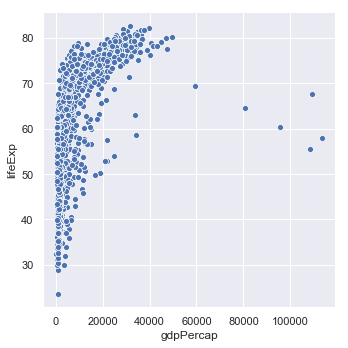

In [71]:
sns.set()
sns.relplot(data=gapminder, x="gdpPercap", y="lifeExp")
plt.show()

Before moving on to a line plot, it's worth noting some of the other visual channels which are available for aesthetic mappings here. 

First, let's try changing the sized based on population. To do this, we can associate the `pop` column with the `size` attribute.

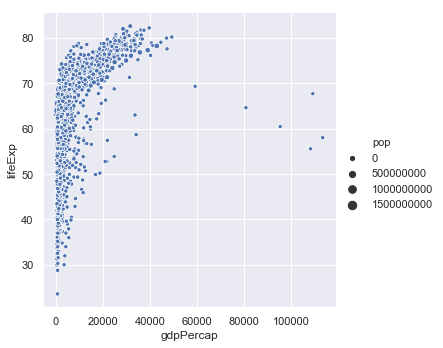

In [160]:
#from matplotlib.colors import LogNorm
g = sns.relplot(data=gapminder, x="gdpPercap", y="lifeExp", size = "pop")
plt.show()

It'd be nice to split things up by continent as well, like we've done before, so what about faceting? That's just as easy. If we want the plots to be faceted horizontally we can assign the `continent` column of the dataframe to the `col` input. If we want them to be faceted vertically we can use the `row` input. Let's do the former this time.

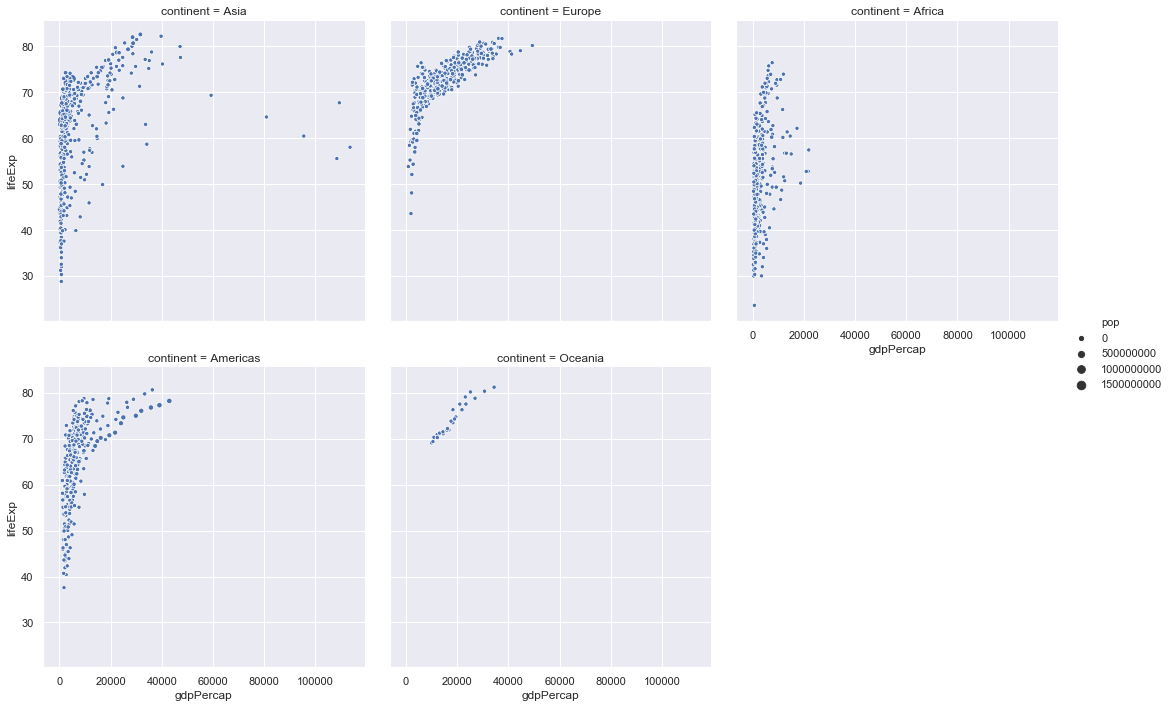

In [103]:
sns.relplot(data=gapminder, x="gdpPercap", y="lifeExp", size = "pop", col="continent", col_wrap=3)
plt.show()

The fonts are a bit small and could probably use a log scale, but we can get back to fixing these problems later. For now, let's move on to making a line plot using `relplot`. In order to make this change, we need only specify the `kind` variable as `"line"`. Now, we can go ahead and plot average life expectancy by year.  

Note that by default `relplot` will average over columns and give 95% confidence interval bands.

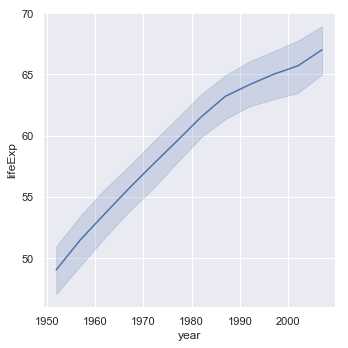

In [97]:
sns.relplot(data=gapminder, x="year", y="lifeExp", kind="line")
plt.show()

What if we want to look at the trend by continent? Let's try tying continent to colour, or as `seaborn` calls it, `hue`. Just to show off the last easily available channel, let's also map continent to `style`.

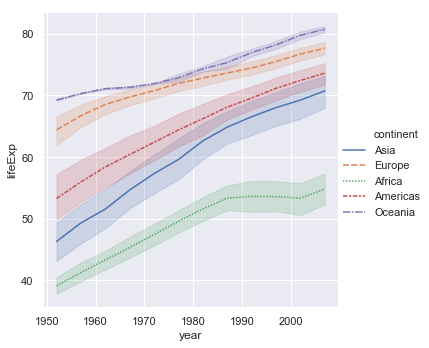

In [80]:
sns.relplot(data=gapminder, x="year", y="lifeExp", kind="line", hue="continent", style="continent")
plt.show()

# 1.2 Your Turn  

Here I've loaded in the `tips` dataset for you. The `tips` dataset contains information about the tips provided information about the tips paid by different customers matched with information on their dining party size, the day and time they visisted the restaurant, their sex, and whether they are a smoker. In order to determine if there is a relationship between the tip size and the sex or smoking habits of the customer, try the following:  
1. Make a scatterplot of tip vs total_bill and do one of the following:
    - Facet on both the sex of the customer and their smoking habits
    - Map at least two of (size, day, time) to features of the plot

In [81]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# YOUR CODE HERE

## 1.3 `catplot` & `distplot` -- Bar, Box, and Swarm Plots (etc.) & Histograms + Density Plots

While `relplot` is nice for numerical variables, it doesn't allow for categorical inputs. That's where `catplot` comes in. `catplot` is another general plotting tool which can plot several different types of plots. Namely, it can plot: bar, box, swarm, violin, boxen, strip, and point plots. We'll only look at the first three here.

To start, we can try to plot the average life expectancy on each continent in a bar chart. Similarly to with `relplot` we may use the `kind` input to specify that we want a barplot.

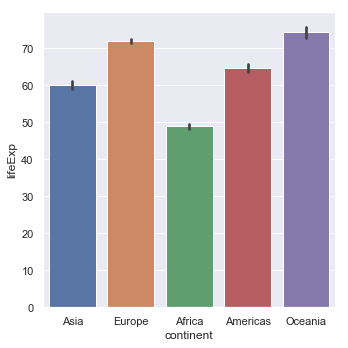

In [122]:
sns.catplot(data=gapminder, x="continent", y="lifeExp", kind="bar")

Again we see that `catplot` will summarize the multiple values for each continent with a mean and confidence interval and plot those automatically.  

If we'd like to provide a bit more information, we can plot a boxplot, which is just as easy as the barplot except now we shall have `kind="box"`.

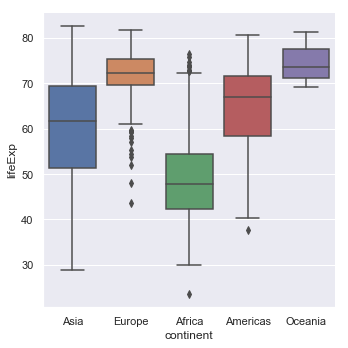

In [123]:
sns.catplot(data=gapminder, x="continent", y="lifeExp", kind="box")

Finally, let's try out a new plot type -- swarm plot. Swarm plot is similar to jitter, but stacks points horizontally rather than just adding noise. Let's take a look.

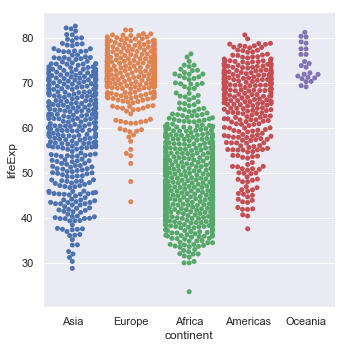

In [124]:
sns.catplot(data=gapminder, x="continent", y="lifeExp", kind="swarm")

There are several more options with `catplot` that you can explore on your own, but let's move on to plotting a simple histogram using `distplot`. Make sure to take note of the slightly different way in which data is passed to `distplot`.

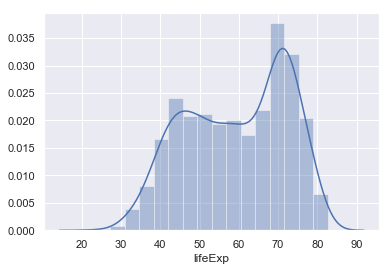

In [155]:
sns.distplot(gapminder["lifeExp"])

If we want, we can easily remove the density estimate and keep the histogram or vice-versa:

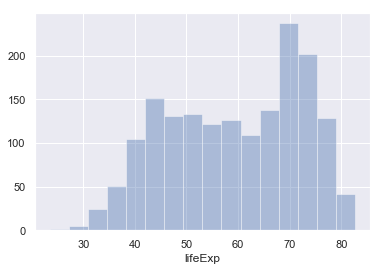

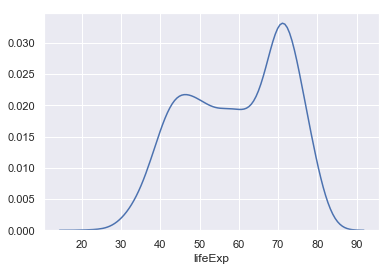

In [156]:
sns.distplot(gapminder["lifeExp"], kde=False, norm_hist=False)
plt.show()
sns.distplot(gapminder["lifeExp"], hist=False)
plt.show()

Since `catplot` and `distplot` have been relatively straightforward extensions of the knowledge used for `relplot`, let's also take the time here to look at overlaying different types of plots.

## 1.4 Combining Plots - Figure-level vs Axes-level

The trivial thing to try first when trying to combine two plots is to just run two plotting commands in the same cell like we did for matplotlib:

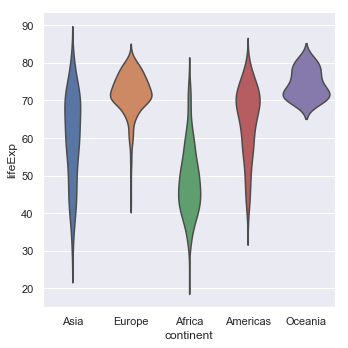

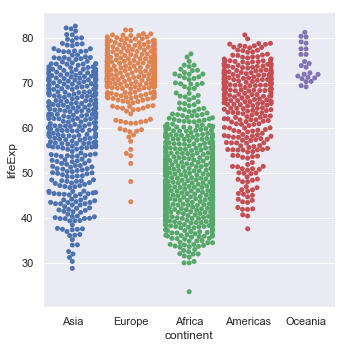

In [134]:
g=sns.catplot(data=gapminder, x="continent", y="lifeExp", kind="violin", inner=None);
g=sns.catplot(data=gapminder, x="continent", y="lifeExp", kind="swarm")

Clearly, this doesn't work, but why?  

In seaborn there are two types of plotting functions **figure-level** functions and **axes-level** functions. Figure-level functions are optimized for EDA because they set up the `matplotlib` figure containing the plot(s) and make it easy to spread out the visualization across multiple axes if desired. These functions create a seaborn specific object called a `FacetGrid` as their output. This output cannot be acted on directly by `matplotlib` functions. Instead, one must use the built in methods (that call matplotlib functions for you). Axes-level functions work only with the axes objects you're used to from `matplotlib` and output a regular `matplotlib` axes as output, allowing direct use of `matplotlib` functions. Additionally, because they work only with the axes, you can pass the axes object you want them to plot onto as a function parameter.

Let's look at `relplot`, `catplot`, `distplot`, and one new function (`barplot`) to determine their output types:

<class 'seaborn.axisgrid.FacetGrid'>
<class 'seaborn.axisgrid.FacetGrid'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


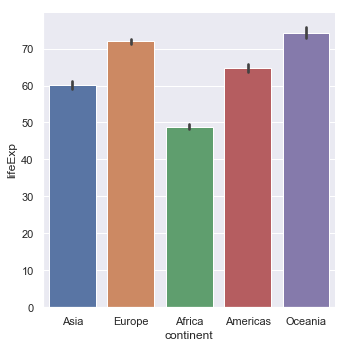

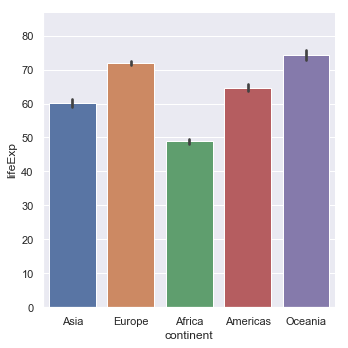

In [158]:
print(type(sns.catplot(data=gapminder, x="continent", y="lifeExp", kind="bar")));
print(type(sns.relplot(data=gapminder, x="gdpPercap", y="lifeExp")));
print(type(sns.distplot(gapminder["lifeExp"])));
print(type(sns.barplot(data=gapminder, x="continent", y="lifeExp")));

Clearly we see that `relplot` and `catplot` are figure-level functions, while `distplot` and `barplot` are axes-level functions. But, where did this new `barplot` function come from? It's the function that `catplot` calls when you ask for a bar plot! `catplot` and `relplot` are both figure-level functions that call different axes-level functions depending on what you specify via `kind`. 

So, if we want to plot a swarmplot on top of a violin plot, we shouldn't use catplot; rather, we should use the functions it calls since these functions will not alter the previously plotted part of the figure. It seems these functions have obvious names (like `barplot`), so let's just give `violinplot` and `swarmplot` a try as possible names.

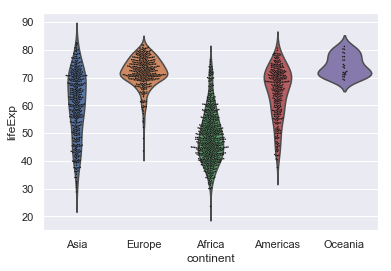

In [146]:
g=sns.violinplot(data=gapminder, x="continent", y="lifeExp", inner=None)
g=sns.swarmplot(data=gapminder, x="continent", y="lifeExp", size=1.5, color='k')

Sure enough, those are the names. There you have it, a swarm plot plotted over a violin plot.

### 1.4.1 Exercise

The above plot shows the underlying points used to make an estimate of the density function for the violin plot, as well as the density estimate itself. What does this plot tell you about the reliability of each density estimate? Are there any continents where the density estimate seems particularly reliable/unreliable?

>YOUR_ANSWER_HERE

# 2 Customizing Labels, Scales, etc.

As mentioned before, the way in which you interact with a plot depends on whether it's a figure-level plot or an axes-level plot. If it's an axes-level plot you can interact with in the same way you'd interact with a `matplotlib` function (with the addition of a fewer `seaborn` helper functions), so let's focus on interacting with figure-level plots.

Of course, first we need a plot, so let's go back to our very first scatter plot. This time, saving it in the variable g, so it's easier to interact with.

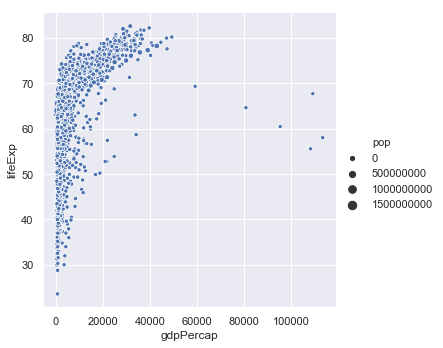

In [161]:
g = sns.relplot(data=gapminder, x="gdpPercap", y="lifeExp", size = "pop")
plt.show()

For general theming we have the function `sns.set`.  
Now some particularly relevant methods for a `FacetGrid`:
- add_legend
- despine
- set
- set_axis_labels
- set_xlabels, set_ylabels
- set_xticklabels, set_yticklabels